<a href="https://colab.research.google.com/github/KevinCantrell/carbon_dioxide/blob/master/Greenhouse_student_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the data data provided by [NOAA/ESRL's Global Monitoring Division](https://www.esrl.noaa.gov/gmd/dv/data/index.php?parameter_name=Carbon%2BDioxide&frequency=Daily%2BAverages&site=MLO) to predict the insitu concentration of carbon dioxide in the atmosphere above Mauna Loa on UP's graduation.

We will use a [GitHub repository](https://github.com/KevinCantrell/carbon_dioxide.git) for sharing and colaborating in this project.  You should
* make an account on GitHub
* give me your GitHub username so that I can add you as a collaborator and then accept the invitation
* download and install GitHub desktop
* clone the repository to your VM
* make your own branch and push it back to GitHub

The basic tasks are as follows:

* 1) Get the data (pandas [read_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html))
* 2) Clean the data
 * handle dates (pandas [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html))
 * drop missing data (pandas [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) followed by [reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html))
* 3) Plot the data
* 4) Develop and refine a fitting model (scipy [optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html))
 * start by fitting the data we have
 * start with a 2nd order polynomial
 * calculate and plot the residuals
 * estimate the error of the fit using the equation for standard error
 * modify the fitting functions to better fit the data
 * repeat until we have a good fit
* 5) Apply the optimized fitting function to future days
 * you can use numpy's linspace to construct an arbitrary array for the day number and then call your function with that array as the x-value
 * you will want to convert from elapsed days back into DateTime using [time deltas in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html)


* 6) Communicate your results in a coherent way
 * This communication will include a well-annotated interactive plot that displays CO2 levels (experimental and fit) on the y-axis and timestamp on the x-axis. It should indicate the predicted level of CO2 on May 1st.  You can check the accuracy of your prediction at [CO2.earth](https://www.co2.earth/daily-co2). (Include a screenshot)
 * Push your script and saved figure back to your branch on GitHub. (Include a screenshot of GitHub Desktop showing a recent fetch of the origin and no local changes.)


For the A-level extensions, you may do as many as you'd like. It is OK (and encouraged) to work in small groups. Once your modifications are tested, you should create a pull request to merge the changes on your branch of the GitHub repository back into the master branch.

A-level 1:
* Convert to automated download of the most current dataset using the [ftplib library](https://docs.python.org/3/library/ftplib.html) and [the GRM server](ftp://aftp.cmdl.noaa.gov/data/trace_gases/co2/in-situ/surface/mlo/co2_mlo_surface-insitu_1_ccgg_DailyData.txt)

A-level 2:
 * Add to the annotation on the plot to include the equation for the fit, the standard error of the fit, and the standard error for each fitting coefficient. (see last code block below for helper code that will need modification)

A-level 3:
* Check your model using past data and estimate error
 * leave out the data for all of the last year and do the fit again using your initial (non-optimized) guesses
 * use the last year to validate your model and calculate the standard error for the data points in the last year
 * use this value for the error in your prediction instead of the error for the fit


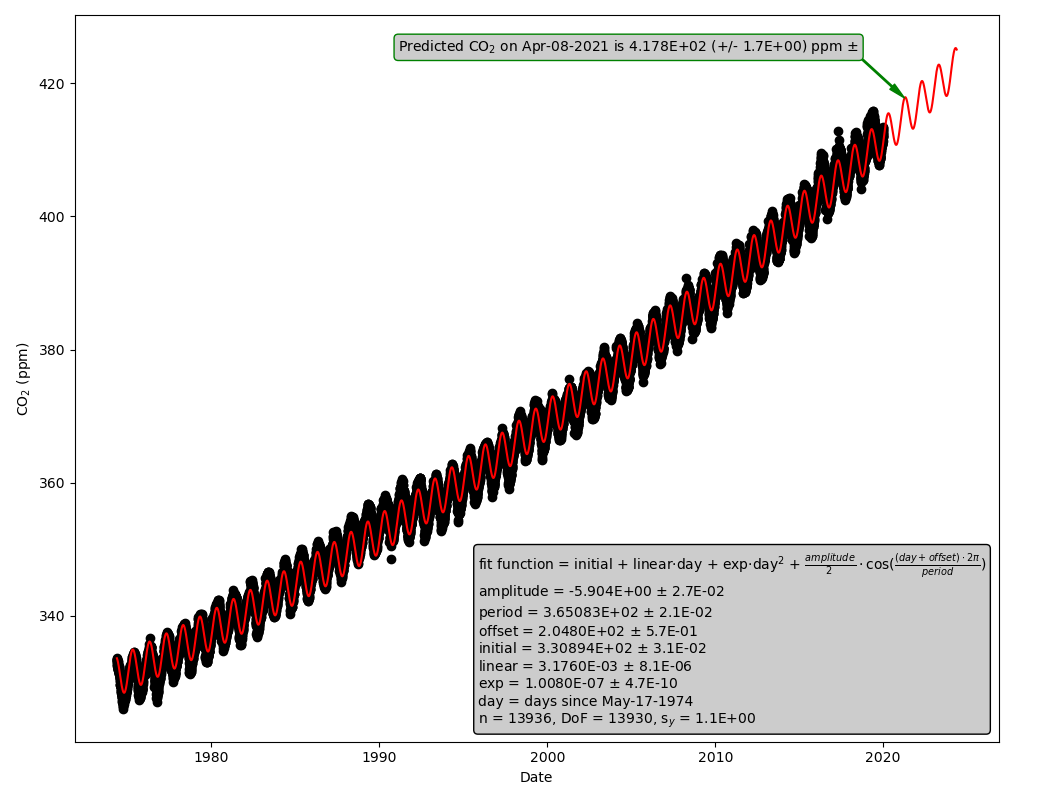



**Base Level (Week #10):**

Upload your script and a screenshot that includes a figure showing measured $CO_2$ (black points) and your fit values (red line). Your fit does not need to be optimized yet.

**A-level (Week #10):**

Synchronize your branch in the GitHub repository with your local files.  Upload a screenshot of the GitHub Desktop window showing no local changes.


In [ ]:
startDate=min(dfCarbonDioxide['date'])
timeElapsed=dfCarbonDioxide['date']-startDate
daysSinceStart=timeElapsed.dt.days